# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [3]:


def apply_svd_custom(X_train, X_test, n_components):

    cov_matrix = np.dot(X_train.T, X_train) / (X_train.shape[0] - 1)


    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    top_eigenvectors = eigenvectors[:, :n_components]

    X_train_reduced = np.dot(X_train, top_eigenvectors)
    X_test_reduced = np.dot(X_test, top_eigenvectors)

    return X_train_reduced, X_test_reduced, top_eigenvectors



## Part 3: Train Logistic Regression and Measure Performance

In [4]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [5]:

svd_components = [10, 20,30,  50, 60, 100, 200, 500, 784]

results = []

for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components")

    X_train_svd, X_test_svd, _ = apply_svd_custom(X_train, X_test, n_components)

    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    results.append((n_components, accuracy, training_time))

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

print("Summary")
for n_components, accuracy, training_time in results:
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Applying custom SVD with 10 components


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8020, Training time: 1.1551 seconds
Applying custom SVD with 20 components


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8779, Training time: 1.6237 seconds
Applying custom SVD with 30 components


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 30, Accuracy: 0.8924, Training time: 5.5283 seconds
Applying custom SVD with 50 components


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 16.2842 seconds
Applying custom SVD with 60 components


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 60, Accuracy: 0.9133, Training time: 19.6966 seconds
Applying custom SVD with 100 components


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 56.9253 seconds
Applying custom SVD with 200 components


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9206, Training time: 150.9158 seconds
Applying custom SVD with 500 components


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9205, Training time: 524.9198 seconds
Applying custom SVD with 784 components


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 866.2503 seconds
Summary
SVD components: 10, Accuracy: 0.8020, Training time: 1.1551 seconds
SVD components: 20, Accuracy: 0.8779, Training time: 1.6237 seconds
SVD components: 30, Accuracy: 0.8924, Training time: 5.5283 seconds
SVD components: 50, Accuracy: 0.9085, Training time: 16.2842 seconds
SVD components: 60, Accuracy: 0.9133, Training time: 19.6966 seconds
SVD components: 100, Accuracy: 0.9181, Training time: 56.9253 seconds
SVD components: 200, Accuracy: 0.9206, Training time: 150.9158 seconds
SVD components: 500, Accuracy: 0.9205, Training time: 524.9198 seconds
SVD components: 784, Accuracy: 0.9209, Training time: 866.2503 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


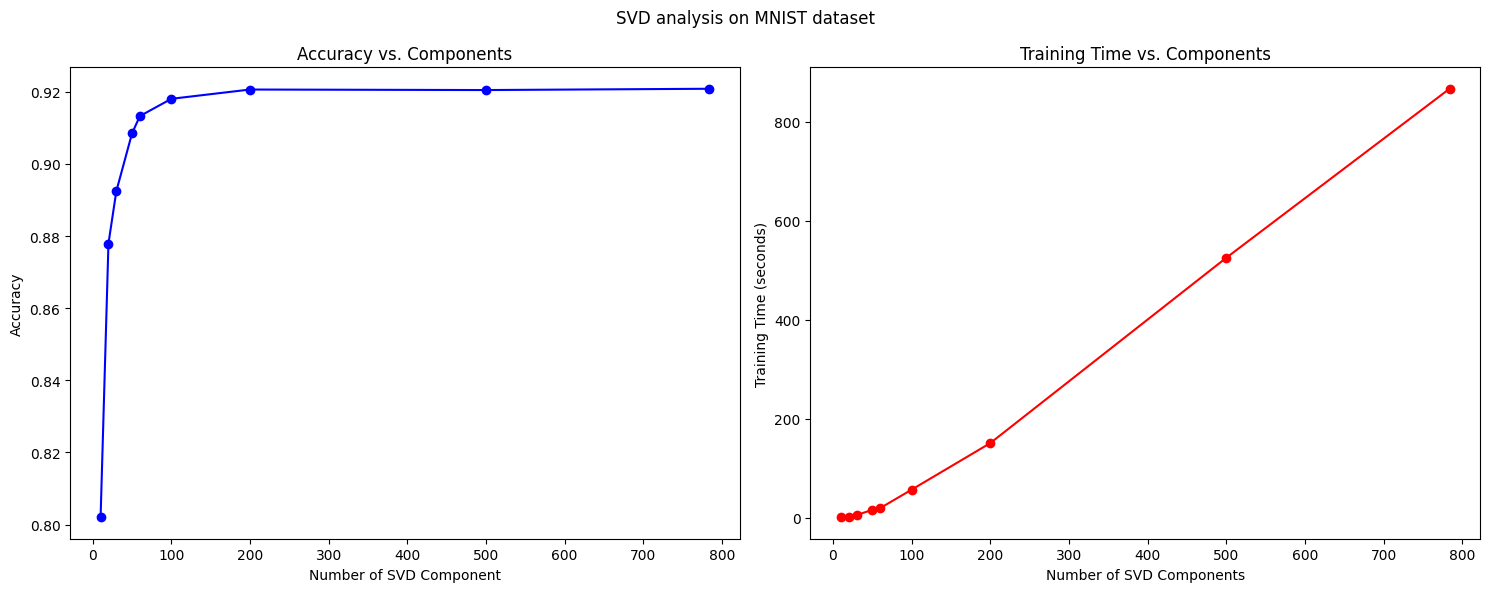

Analysis:
Best accuracy: 0.9209 with 784 components
Fastest training: 1.1551 seconds with 10 components


In [7]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization



components, accuracies, times = zip(*results)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('SVD analysis on MNIST dataset', fontsize=12)

ax1.plot(components, accuracies, 'bo-')
ax1.set_xlabel('Number of SVD Component')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy vs. Components')

ax2.plot(components, times, 'ro-')
ax2.set_xlabel('Number of SVD Components')
ax2.set_ylabel('Training Time (seconds)')
ax2.set_title('Training Time vs. Components')

plt.tight_layout()
plt.savefig('svd_analysis.png')
plt.show()

print("Analysis:")
print(f"Best accuracy: {max(accuracies):.4f} with {components[accuracies.index(max(accuracies))]} components")
print(f"Fastest training: {min(times):.4f} seconds with {components[times.index(min(times))]} components")

## Part 6: Analyze / Conclusion

YOUR ANSWER:

One key observation I had for the graph to the left is that there is are significant accuracy everytime we increase the number of components from 0 - 100, and that increase in accuracy tends to slow down after 100 components, and it stays at around 92%. Even though the highest number of components did yeild the best result, but that minimum improvement comes in the expense of more than 10 minutes of training time. We got this number by comparing the training time for 200 components and 784 components.

By considering the tradeoffs, if I would choose 100 - 200 componets to be my ideal range. I noticed that the training time seems to be going up expotentially, so I do not think is worth it to spend that addtional time to go for that very little accuracy increase. Staying in this range is effective as it provides high accuracy and it reduces the time when being compared to higher components. This is essential if the data gets too big.